In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train=pd.read_csv('/content/gdrive/MyDrive/airbnb/train.csv')
test = pd.read_csv('/content/gdrive/MyDrive/airbnb/test.csv')

In [3]:
train.drop(labels = ['id','name','host_name','neighbourhood','host_id','license','last_review'], axis=1,inplace=True)
test.drop(labels = ['id','name','host_name','neighbourhood','host_id','license','last_review'], axis=1,inplace=True)
print(train.head())
print('-'*100)
print(test.head())

  neighbourhood_group  latitude  longitude        room_type  minimum_nights  \
0            Brooklyn  40.68601  -73.97515  Entire home/apt              30   
1           Manhattan  40.72693  -73.99322  Entire home/apt               3   
2            Brooklyn  40.72358  -73.95426  Entire home/apt               2   
3           Manhattan  40.76038  -73.98196  Entire home/apt              30   
4           Manhattan  40.72899  -73.98091  Entire home/apt              30   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                277               2.28                               1   
1                 37               0.50                               1   
2                 25               0.24                               1   
3                 16               0.15                               5   
4                  7               0.15                               1   

   availability_365  number_of_reviews_ltm  price  
0               288   

<ipython-input-4-c20bf9daaeb3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['price'])


<Axes: xlabel='price', ylabel='Density'>

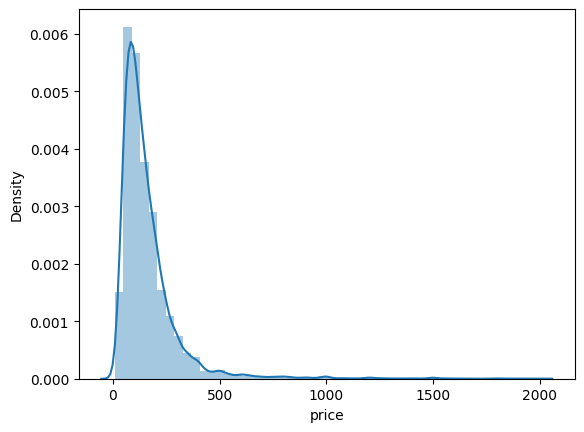

In [4]:
sns.distplot(train['price'])

In [5]:
num_features = []
cate_features = []
for col in test.columns:
    if test[col].dtype == 'object':
        cate_features.append(col)
    else:
        num_features.append(col)
print('数值型特征：', len(num_features))
print('类别型特征：', len(cate_features))

数值型特征： 8
类别型特征： 2


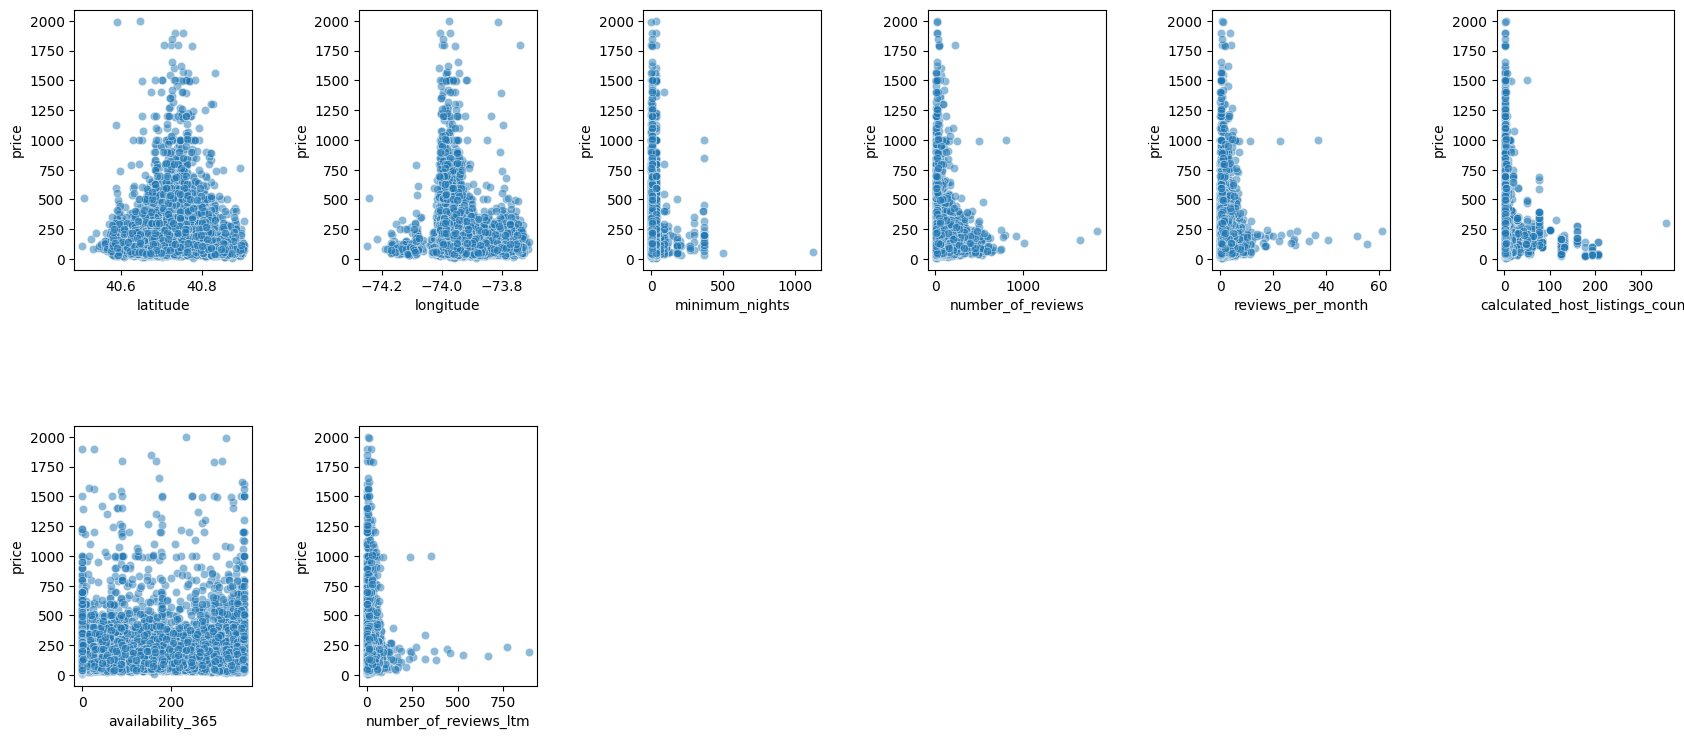

In [6]:
#数值特征与目标值画散点图
plt.figure(figsize=(20, 30))
plt.subplots_adjust(left=0.1, bottom=0.1,wspace=0.6,hspace=0.6)
for i, feature in enumerate(num_features):
    plt.subplot(6,6, i+1)
    sns.scatterplot(x=feature, y='price', data=train, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('price')
plt.show()

In [7]:
from scipy.stats import norm
from scipy.stats import kurtosis
from scipy.stats import skew
y = train['price']
y = np.log1p(y)

# sns.distplot(y, fit=norm)

# print('处理后峰度：',y.skew())
# print('处理后偏度：',y.kurtosis())
# plt.show()

In [8]:
train

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price
0,Brooklyn,40.686010,-73.975150,Entire home/apt,30,277,2.28,1,288,1,199
1,Manhattan,40.726930,-73.993220,Entire home/apt,3,37,0.50,1,4,0,432
2,Brooklyn,40.723580,-73.954260,Entire home/apt,2,25,0.24,1,134,3,400
3,Manhattan,40.760380,-73.981960,Entire home/apt,30,16,0.15,5,70,0,129
4,Manhattan,40.728990,-73.980910,Entire home/apt,30,7,0.15,1,0,0,250
...,...,...,...,...,...,...,...,...,...,...,...
16216,Brooklyn,40.670870,-73.878240,Private room,30,22,0.32,2,365,1,52
16217,Manhattan,40.799780,-73.963660,Private room,3,6,0.88,2,245,6,105
16218,Manhattan,40.822540,-73.950560,Private room,3,156,1.95,2,181,28,89
16219,Manhattan,40.733820,-73.996830,Private room,6,57,0.57,1,120,21,125


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#for col in cate_features:
#    train[col] = train[col].astype(str)
#   test[col] = test[col].astype(str)
#cols = ['neighbourhood_group', 'room_type']
#for col in cols:
#   encoder = LabelEncoder()
#   value_train = set(train[col].unique())
#   value_test = set(test[col].unique())
#   value_list = list(value_train | value_test)
#   encoder.fit(value_list)
#   train[col] = encoder.transform(train[col])
#   test[col] = encoder.transform(test[col])


In [9]:
train['longitude'] = train['longitude'].map(lambda x: x*(-1))
test['longitude'] = test['longitude'].map(lambda x: x*(-1))

In [10]:
# 计算特征的偏度
numeric_data = train[num_features]
skewed_feats = numeric_data.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
print(skewness.head(10))

                                     Skew
minimum_nights                  13.345968
number_of_reviews_ltm           10.661104
reviews_per_month                7.814058
calculated_host_listings_count   6.210925
number_of_reviews                4.753412
availability_365                 0.401314
latitude                         0.275197
longitude                       -1.035663


In [11]:
new_skewness = skewness[skewness.abs() > 0.5]
print("有{}个高偏度特征被Box-Cox变换".format(new_skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = new_skewness.index
lam = 0.15
for feat in skewed_features:
    train[feat] = boxcox1p(train[feat], lam)
    test[feat] = boxcox1p(test[feat], lam)

有8个高偏度特征被Box-Cox变换


In [12]:
dummy_features = list(set(cate_features))
dummy_features

['room_type', 'neighbourhood_group']

In [13]:
train

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price
0,Brooklyn,4.998939,6.072656,Entire home/apt,4.492018,8.839893,1.300242,0.730463,8.930418,0.730463,199
1,Manhattan,5.000656,6.073117,Entire home/apt,1.540963,4.838059,0.418049,0.730463,1.820334,0.000000,432
2,Brooklyn,5.000515,6.072124,Entire home/apt,1.194318,4.201461,0.218619,0.730463,7.247551,1.540963,400
3,Manhattan,5.002058,6.072830,Entire home/apt,4.492018,3.530419,0.141237,2.055642,5.968981,0.000000,129
4,Manhattan,5.000742,6.072803,Entire home/apt,4.492018,2.440268,0.141237,0.730463,0.000000,0.000000,250
...,...,...,...,...,...,...,...,...,...,...,...
16216,Brooklyn,4.998303,6.070185,Private room,4.492018,4.003419,0.283494,1.194318,9.492944,0.730463,52
16217,Manhattan,5.003709,6.072363,Private room,1.540963,2.259674,0.662126,1.194318,8.558043,2.259674,105
16218,Manhattan,5.004662,6.072029,Private room,1.540963,7.566243,1.174525,1.194318,7.885225,4.380946,89
16219,Manhattan,5.000945,6.073209,Private room,2.259674,5.591427,0.466686,0.730463,7.020909,3.932510,125


In [14]:
train_data = pd.get_dummies(train)#train
test_data = pd.get_dummies(test)#test

In [15]:
import numpy as np
import pandas as pd
import time

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))  # 限制浮点输出到小数点后3位



In [16]:
print('The shape of training data:', train_data.shape)
print('The shape of testing data:', test_data.shape)

The shape of training data: (16221, 18)
The shape of testing data: (5407, 17)


In [17]:
train_data.values

array([[4.99893896, 6.07265614, 4.49201774, ..., 0.        , 0.        ,
        0.        ],
       [5.00065593, 6.07311664, 1.54096276, ..., 0.        , 0.        ,
        0.        ],
       [5.00051542, 6.07212365, 1.19431764, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [5.00466207, 6.07202932, 1.54096276, ..., 0.        , 1.        ,
        0.        ],
       [5.00094488, 6.07320863, 2.25967379, ..., 0.        , 1.        ,
        0.        ],
       [4.99732496, 6.07202528, 1.8203341 , ..., 0.        , 1.        ,
        0.        ]])

In [18]:
train

,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,price
0,Brooklyn,4.999,6.073,Entire home/apt,4.492,8.840,1.300,0.730,8.930,0.730,199
1,Manhattan,5.001,6.073,Entire home/apt,1.541,4.838,0.418,0.730,1.820,0.000,432
2,Brooklyn,5.001,6.072,Entire home/apt,1.194,4.201,0.219,0.730,7.248,1.541,400
3,Manhattan,5.002,6.073,Entire home/apt,4.492,3.530,0.141,2.056,5.969,0.000,129
4,Manhattan,5.001,6.073,Entire home/apt,4.492,2.440,0.141,0.730,0.000,0.000,250
...,...,...,...,...,...,...,...,...,...,...,...
16216,Brooklyn,4.998,6.070,Private room,4.492,4.003,0.283,1.194,9.493,0.730,52
16217,Manhattan,5.004,6.072,Private room,1.541,2.260,0.662,1.194,8.558,2.260,105
16218,Manhattan,5.005,6.072,Private room,1.541,7.566,1.175,1.194,7.885,4.381,89
16219,Manhattan,5.001,6.073,Private room,2.260,5.591,0.467,0.730,7.021,3.933,125


In [19]:
y_train = np.log1p(train_data.pop('price'))
x_train = train_data.values

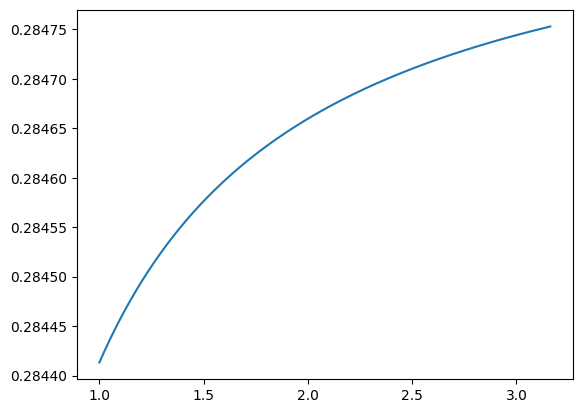

In [ ]:

#y_train = np.log1p(train_data.pop('price'))
#alphas =np.logspace(0,0.5,50)
#test_scores = []
#for alpha in alphas:
#    clf = Ridge(alpha)
#    test_score = np.sqrt(-cross_val_score(clf,train.values,y_train,cv=10,scoring='neg_mean_squared_error'))
#    test_scores.append(np.mean(test_score))
#plt.plot(alphas,test_scores)
#plt.show()



1e-06 0.2755919008438522
1.0481131341546853e-06 0.2755920378092124
1.0985411419875572e-06 0.2755921878905418
1.151395399326448e-06 0.27559235235973556
1.2067926406393288e-06 0.2755925325683481
1.2648552168552959e-06 0.27559273018528224
1.325711365590108e-06 0.27559294677853047
1.389495494373139e-06 0.27559318423637336
1.4563484775012444e-06 0.2755934445773902
1.5264179671752333e-06 0.2755937300989646
1.5998587196060574e-06 0.27559404315420377
1.6768329368110065e-06 0.27559438647804246
1.757510624854793e-06 0.2755947630225267
1.8420699693267164e-06 0.2755951759873557
1.9306977288832498e-06 0.2755956289970073
2.0235896477251557e-06 0.27559612600732114
2.1209508879201924e-06 0.27559667122227555
2.2229964825261954e-06 0.2755972693950496
2.3299518105153717e-06 0.27559792570143377
2.4420530945486497e-06 0.2755986458987489
2.5595479226995334e-06 0.2755994361063995
2.6826957952797274e-06 0.27560030326041196
2.811768697974231e-06 0.2756012548116465
2.94705170255181e-06 0.27560229913810896
3.088

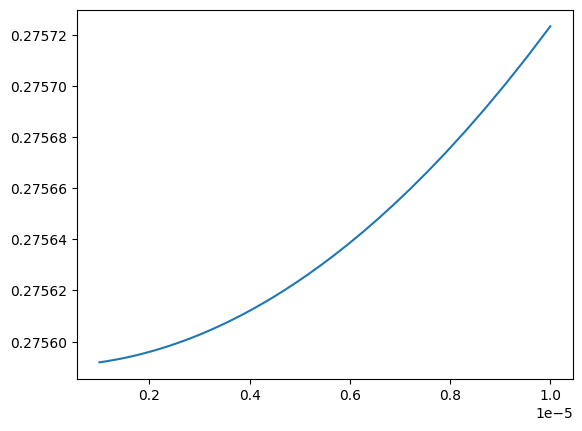

In [ ]:
#lasso_alpha = np.logspace(-6,-5,50)
#test_scores = []
#for alpha in lasso_alpha:
#    lasso =Lasso(alpha)
#    test_score = np.sqrt(-cross_val_score(lasso, train.values, y_train, scoring='neg_mean_squared_error', cv=10))
#    test_scores.append(np.mean(test_score))
#    print(alpha,np.mean(test_score))
#plt.plot(lasso_alpha,test_scores)
#plt.show()


N:400,平均test_score:0.06465662537717279
N:450,平均test_score:0.0643371105317557
N:500,平均test_score:0.06423371623523152
N:550,平均test_score:0.06425205166668782
N:600,平均test_score:0.06495402085854958


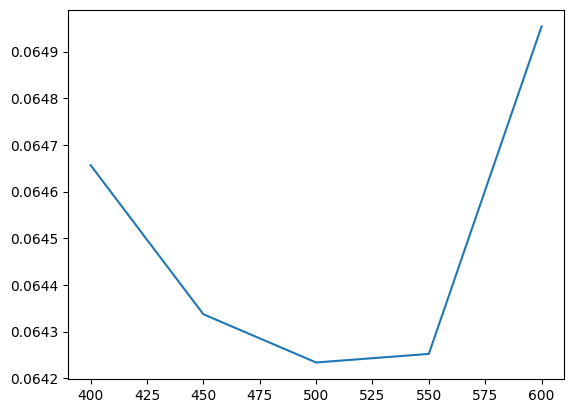

In [ ]:

#from sklearn.ensemble import RandomForestRegressor
#Ns = [400,450,500,550,600]
#test_scores = []
#for N in Ns:
#    clf = RandomForestRegressor(n_estimators=N, max_features=0.3)
#    test_score = np.sqrt(-cross_val_score(clf, train.values, y_train, cv=10, scoring='neg_mean_squared_error'))
#    test_scores.append(np.mean(test_score))
#    print(f"N:{N},平均test_score:{sum(test_score)/10}")
#
#plt.plot(Ns,test_scores)
#plt.show()


In [20]:
forest = RandomForestRegressor(n_estimators=500, max_features=0.3)
forest.fit(x_train,y_train)


RandomForestRegressor(max_features=0.3, n_estimators=500)

In [ ]:
#lasso = Lasso(alpha=0.000007)
#lasso.fit(train_data.values, y_train)


In [21]:
test_data.values

array([[5.0024163 , 6.07231331, 4.49201774, ..., 0.        , 0.        ,
        0.        ],
       [5.00227759, 6.07271068, 4.49201774, ..., 0.        , 0.        ,
        0.        ],
       [4.99874417, 6.07157191, 2.05564154, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [4.99931293, 6.07200357, 4.49201774, ..., 0.        , 1.        ,
        0.        ],
       [4.99745202, 6.07178227, 1.19431764, ..., 0.        , 1.        ,
        0.        ],
       [4.99911399, 6.07210606, 0.73046315, ..., 0.        , 1.        ,
        0.        ]])

In [22]:
#lasso_predict = lasso.predict(test_data.values)
#y_lasso = np.expm1(lasso_predict)
forest_predict = forest.predict(test_data.values)
y_forest = np.expm1(forest_predict)

In [23]:
#y_lasso
y_forest

array([174.60973922, 167.92929674, 184.15490884, ...,  54.32967162,
        65.33216117,  80.72122449])

In [24]:
test0 = pd.read_csv('/content/gdrive/MyDrive/airbnb/test.csv')
test_id = test0['id']
submission=pd.DataFrame()
submission['id']=test_id
submission['price'] = y_forest#y_lasso


In [25]:
submission

,id,price
0,a15723889,174.610
1,a40861640,167.929
2,a27466647,184.155
3,a50643073,74.172
4,a8953200,52.472
...,...,...
5402,a14110144,144.203
5403,a7769782,69.138
5404,a19066190,54.330
5405,a53572965,65.332


In [26]:
submission.to_csv('/content/gdrive/MyDrive/airbnb/subm.csv', index=False)